Antes de empezar, definiremos todas las funciones necesarias que hemos usado. Aunque muchas se encuentran en las presentaciones, es necesario para poder correr el código en cualquier entorno sin necesidad de nada. Las funciones en R que usaremos son las siguientes:

In [129]:
firstindex=function(x,a){
  x=sort(x)
  for (i in seq(1,length(x))){
    if (x[i]==a){
      i
      break
    }
  }
  if (i==length(x)){
    print("Este valor que has insertado no se encuentra en el vector")
  }
  
  i
}

skew=function(x){
   m3 <- sum((x-mean(x))^3)/length(x)
   s3 <- sd(x)^3
   m3/s3
 }

kurtosis <- function(x){
  m4 <- sum((x-mean(x))^4)/length(x)
  s4 <- var(x)^2
  m4/s4
}

medarm=function(x){
  length(x)/sum(1/x)
}

medgeo=function(x){
  if (prod(x)>0) {
    prod(x)^(1/length(x))
  }
  else {
    if (length(x)%%2==1){
      -prod(abs(x))^(1/length(x))
    }
    else {
      NaN
    }
  }
}

medgeo2=function(x){
  if (prod(x)<=0){
    print("Cuidado, hay numeros negativos o iguales a cero ")
  }
  else{
    exp(sum(log(x))/length(x))
  }
}

medqua=function(x){
  sign(sum(x))*sqrt(sum(x*x)/length(x))
}


Con todo esto definido, empecemos con el entregable

## Cuestión 1

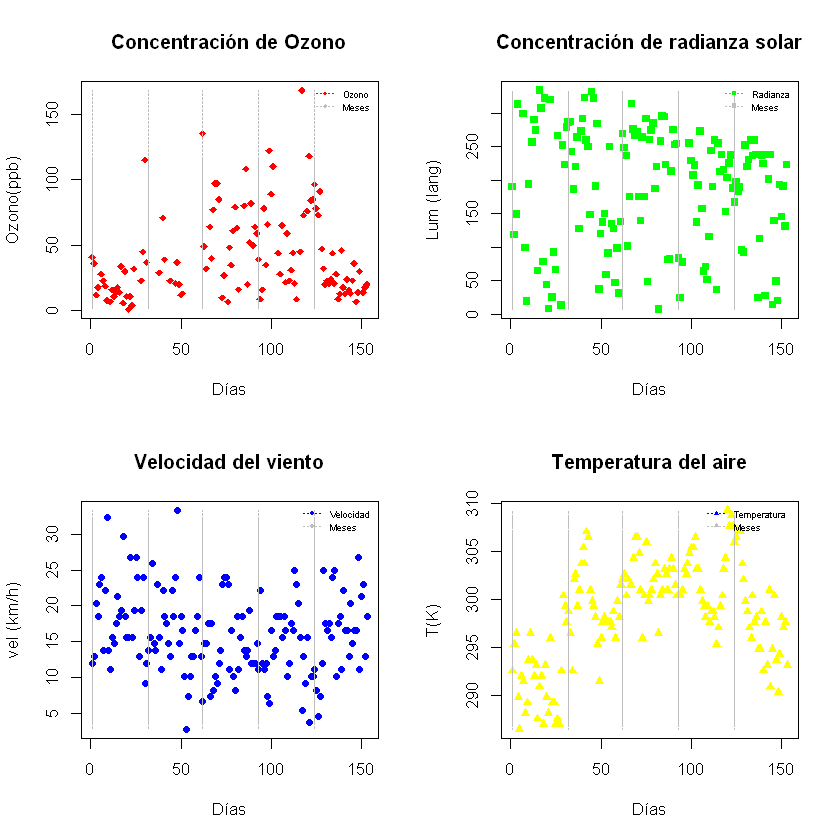

In [130]:
a=airquality
days=as.numeric(a$Day);
temps=as.numeric((a$Temp-32)*5/9+273.15) #Pasamos las T a Kelvin
winds=as.numeric(a$Wind*1.60934)#Pasamos las v a km/h
t=seq(1:length(days))#Definimos un vector con todos los días que se midió
source("firstindex.R") #Una función que me diga donde está el primer término de un vector igual a un valor a
o=firstindex(a$Month,5); p=firstindex(a$Month,6); q=firstindex(a$Month,7); r=firstindex(a$Month,8); s=firstindex(a$Month,9)
par(mfrow=c(2,2))
plot(t,a$Ozone,pch=18,col="red", main="Concentración de Ozono",xlab="Días", ylab="Ozono(ppb)")
lines(t[o]*rep(1,length(a$Ozone)),a$Ozone,lty=3,col="grey"); lines(t[p]*rep(1,length(a$Ozone)),a$Ozone,lty=3,col="grey")
lines(t[q]*rep(1,length(a$Ozone)),a$Ozone,lty=3,col="grey"); lines(t[r]*rep(1,length(a$Ozone)),a$Ozone,lty=3,col="grey")
lines(t[s]*rep(1,length(a$Ozone)),a$Ozone,lty=3,col="grey")
legend(x="topright",legend=c("Ozono","Meses"),pch=18, lty=3, col=c("red","grey"),cex=0.56,bty="n")
plot(t,a$Solar.R,pch=15, col="green",main="Concentración de radianza solar",xlab="Días",ylab="Lum (lang)")
lines(t[o]*rep(1,length(a$Solar.R)),a$Solar.R,lty=3,col="grey"); lines(t[p]*rep(1,length(a$Solar.R)),a$Solar.R,lty=3,col="grey")
lines(t[q]*rep(1,length(a$Solar.R)),a$Solar.R,lty=3,col="grey"); lines(t[r]*rep(1,length(a$Solar.R)),a$Solar.R,lty=3,col="grey")
lines(t[s]*rep(1,length(a$Solar.R)),a$Solar.R,lty=3,col="grey")
legend(x="topright",legend=c("Radianza","Meses"),pch=15, lty=3, col=c("green","grey"),cex=0.56,bty="n")
plot(t,winds,pch=16, col="blue",main="Velocidad del viento",xlab="Días", ylab="vel (km/h)")
lines(t[o]*rep(1,length(a$Wind)),winds,lty=3,col="grey"); lines(t[p]*rep(1,length(a$Wind)),winds,lty=3,col="grey")
lines(t[q]*rep(1,length(a$Wind)),winds,lty=3,col="grey"); lines(t[r]*rep(1,length(a$Wind)),winds,lty=3,col="grey")
lines(t[s]*rep(1,length(a$Wind)),winds,lty=3,col="grey")
legend(x="topright",legend=c("Velocidad","Meses"),pch=16, lty=3, col=c("blue","grey"),cex=0.56,bty="n")
plot(t,temps,pch=17, col="yellow",main="Temperatura del aire", xlab="Días", ylab="T(K)")
lines(t[o]*rep(1,length(a$Temp)),temps,lty=3,col="grey"); lines(t[p]*rep(1,length(a$Temp)),temps,lty=3,col="grey")
lines(t[q]*rep(1,length(a$Temp)),temps,lty=3,col="grey"); lines(t[r]*rep(1,length(a$Temp)),temps,lty=3,col="grey")
lines(t[s]*rep(1,length(a$Temp)),temps,lty=3,col="grey")
legend(x="topright",legend=c("Temperatura","Meses"),pch=17, lty=3, col=c("blue","grey"),cex=0.56,bty="n")

Hemos representado las variables que nos piden respecto al tiempo. Al tener separación entre meses, es util ver las concentraciones en cada mes, ilustradas por las que se encuentran en medio de las lineas delimitadoras.

## Cuestión 2

[1] 12


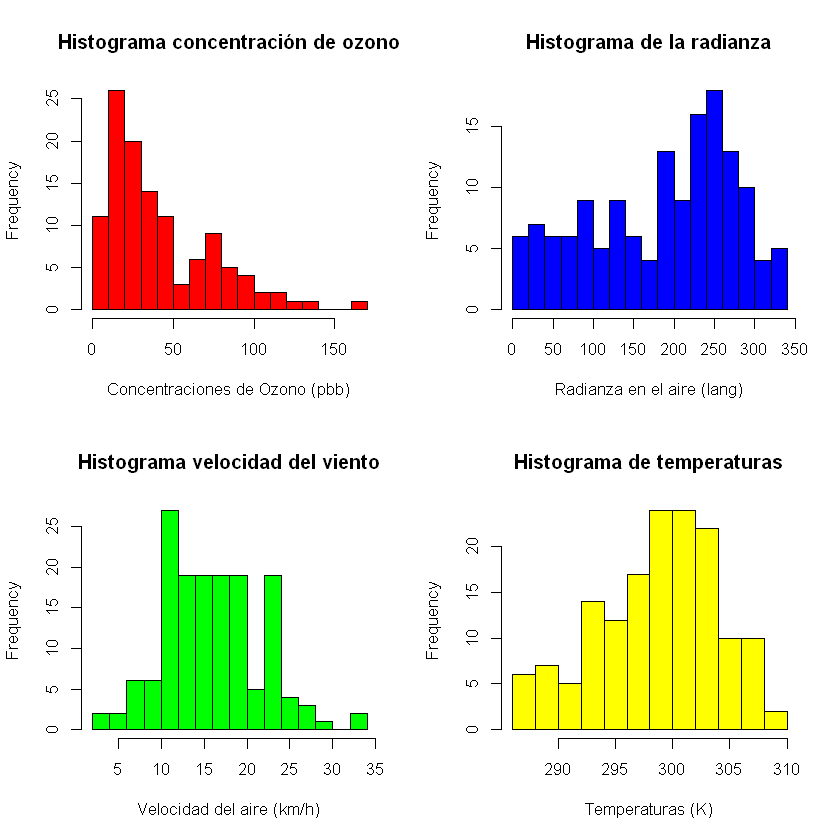

In [131]:
#dev.off()
n_bins=as.integer((length(t))^(1/2)); print(n_bins)
par(mfrow=c(2,2))
hist(a$Ozone,breaks=n_bins,col="red", main="Histograma concentración de ozono",xlab="Concentraciones de Ozono (pbb)")
hist(a$Solar.R,breaks=n_bins,col="blue", main="Histograma de la radianza",xlab="Radianza en el aire (lang)")
hist(winds,breaks=n_bins, col="green", main="Histograma velocidad del viento",xlab="Velocidad del aire (km/h)")
hist(temps,breaks=n_bins,col="yellow", main="Histograma de temperaturas", xlab="Temperaturas (K)")

Observa que no nos hace caso con el numero de bins que tiene que tener. Esto se debe al propio codigo como tal de hist, que toma el input de break como una sugerencia, pero no tiene por que llevarlo a cabo. Si quisiesemos hacer los 12 bins, tendríamos que definir nosotros a mano las 12 separaciones e introducirlo como algo del tipo break=c(a, ... ,b), pero como este histograma es igualmente ilustrativo, pues nos vale

## Cuestión 3

In [132]:
#Las funciones se definen en las diapositivas.
source("medarm.R")
source("medgeo.R")
source("medqua.R")
source("mimoda.R")
source("medgeo2.R")

Necesitamos lidiar con los datos NA. Tenemos que hacer algo para que quitarlos de nuestros datos a analizar. Hacer una función explicita sería más complicado que usar el propio R. Quitándo los NA:


In [133]:
Rad=a$Solar.R[!is.na(a$Solar.R)]
medarmSR=medarm(Rad)
medgeoSR=medgeo(Rad)
medquaSR=medqua(Rad)
medariSR=mean(Rad)
medianSR=median(Rad)
print(medarm(Rad)); print(medgeo(Rad)); print(medqua(Rad)); print(mean(Rad)); print(median(Rad))

[1] 90.66406
[1] Inf
[1] 206.4594
[1] 185.9315
[1] 205


Hay un problema! Tenemos que redefinir la medgeo porque da infinito. Aplicamos una corrección a la función que ya tenemos, para ver si en logaritmo funciona


In [134]:
medgeoSR=medgeo2(Rad)
print(medarmSR); print(medgeoSR); print(medquaSR);print(medariSR); print(medianSR)
#Ahora, en efecto, funciona :)

[1] 90.66406
[1] 149.5608
[1] 206.4594
[1] 185.9315
[1] 205


Para medir cual es más robusta, podemos observar que los datos que nos fastidian las medias son los datos más pequeños. La media armónica se ve muy afectadas por estos valores que claramente no respetan la tendencia general de valores mayores de 100. Para ver cual es más robusta, podemos cambiar un numero de valores, y ver como cambian nuestras medidas. Veamos:

In [135]:
x=sample(1:length(Rad),5) #Los indices de los datos que cambiaremos. Los 
#cambiaremos por un término aleatorio dado por una distribución uniforme, entre el minimo y máximo de la medida.
Rad2=Rad
for (i in 1:length(Rad)){
  for (j in 1:length(x)){
    if (i==x[j]){
      Rad2[i]=runif(1,min=min(Rad),max=max(Rad))
        }
    }
}

Para ver las fluctuaciones, restaremos las medias y los valores de los datos nuevos respecto a los viejos, dividiendo entre el valor inicial, y veremos como cambia cada uno


In [136]:
fluctuaciones=c((mean(Rad2)-mean(Rad))/mean(Rad),(medarm(Rad2)-medarm(Rad))/medarm(Rad), 
                (medgeo2(Rad2)-medgeo2(Rad))/medgeo2(Rad),(medqua(Rad2)-medqua(Rad))/medqua(Rad),
                (median(Rad2)-median(Rad))/median(Rad))
print(fluctuaciones)


[1] -0.008335407 -0.022480809 -0.015842870 -0.004274267 -0.029268293


Si lo hacemos de esta forma, la mayor fluctuación será la que presente mayor diferencia. Resalta que, al usar numeros aleatorios la mediana no es la medida más robusta. Esto se debe a debido a la gran dispersión de los datos, una ligera variación de la mediana implicará un gran cambio, por la enorme distancia entre términos contiguos de medidas. Sobre el resto de medidas resalta el hecho de que no podemos asegurar que una de las medias sea más robusta que otras, porque depende el  número aleatorio, las variaciones fluctuan. Por lo general, la media cuadrática suele ser la que menos varie, que puede deberse a la baja sensibilidad que tiene a los valores bajos, que las medidas de Rad están llenas, y por tanto siente menos este tipo de cambios; pero is uno corre este método muchas veces, puede llegar a encontrar que para algun par de numeros aleatorios, la medida más robusta es una, y para otro par, la medida más robusta es otra. Esto hace del método este muy poco conclusivo, así que o bien el método seleccionado no es efectivo, o bien las medidas presentan todas un grado similar de robustez.

## Cuestión 4

In [137]:
rankQ=IQR(winds); desv=sd(winds); madwinds=mad(winds,constant=1)
#Para saber el valor menos robusto, repetimos el proceso con el mismo Rad2
x=sample(1:length(winds),5) #Los indices de los datos que cambiaremos. Los 
winds2=winds
for (i in 1:length(winds)){
  for (j in 1:length(x)){
    if (i==x[j]){
      winds2[i]=runif(1,min(winds),max(winds))
    }
  }
}
fluctuaciones2=c((IQR(winds2)-IQR(winds))/IQR(winds),(sd(winds2)-sd(winds))/sd(winds),(mad(winds2,constant=1)
                 -mad(winds,constant=1))/mad(winds,constant=1))
print(fluctuaciones2)

[1] 0.121951220 0.009489614 0.000000000


Este caso es curioso, porque el rango intercuartílico o bien no varía, o bien varía el que más. La MAD no varia (al menos en las 10 veces que he corrido el codigo). Como la variación de la desviación típica tiene un máximo en aproximadamente 0.16, y el cambio del rango intercuartilico es u 0 u 0.500, podemos afirmar que la mayor variación está en el rango intercuartílico, ya que como promedio cambiará 0.1219511/2, y por tanto, será la medida menos robusta.

# Cuestión 5

In [138]:
#Hay que repetir todo el proceso con todas las variables. Los NA nos fastidian,
#pero sólo falta quitarlos en ozone
Ozone=a$Ozone[!is.na(a$Ozone)]
#Calculando ahora todos los coeficientes
rankQwinds=IQR(winds); desvwinds=sd(winds); madwinds=mad(winds,constant=1); pearwinds=sd(winds)/abs(mean(winds))
rankQozone=IQR(Ozone); desvOzone=sd(Ozone); madOzone=mad(Ozone,constant=1); pearozone=sd(Ozone)/abs(mean(Ozone))
rankQtemps=IQR(temps); desvtemps=sd(temps); madtemps=mad(temps,constant=1); peartemps=sd(temps)/abs(mean(temps))
rankQRad=IQR(Rad); desvRad=sd(Rad); madRad=mad(Rad,constant=1); pearRad=sd(Rad)/abs(mean(Rad))
ranks=c(rankQozone,rankQRad,rankQtemps,rankQwinds); 
names=c("ozone","Rad","temps","winds")
desvs=c(desvOzone,desvRad,desvtemps,desvwinds)
mads=c(madOzone,madRad,madtemps,madwinds)
Coeff_Pearson=c(pearozone,pearRad,peartemps,pearwinds)
table=data.frame(names,ranks,desvs,mads,Coeff_Pearson)
print(table)

  names      ranks     desvs      mads Coeff_Pearson
1 ozone  45.250000 32.987885 17.500000    0.78301506
2   Rad 143.000000 90.058422 66.500000    0.48436343
3 temps   7.222222  5.258483  3.333333    0.01760809
4 winds   6.598294  5.669707  3.701482    0.35380322


Como las desviaciones vienen dadas en distintas unidades, sólo podemos usar el coeficiente de Pearson para compararlas. A partir de este, el segundo más grande indicará la segunda medida con más dispersión, claramente siendo la de Radiación.

## Cuestión 6

In [139]:
#Usaremos las funciones que ya vienen definidas en las presentaciones
set.seed(111)
source("coeffisher.R"); source("kurtosis.R")
tf=skew(temps); tkurt=kurtosis(temps)
print(tf); print(tkurt)

[1] -0.3705073
[1] 2.537107


Para ver gráficamente los resultados, volvamos a plotear el histograma de Temps


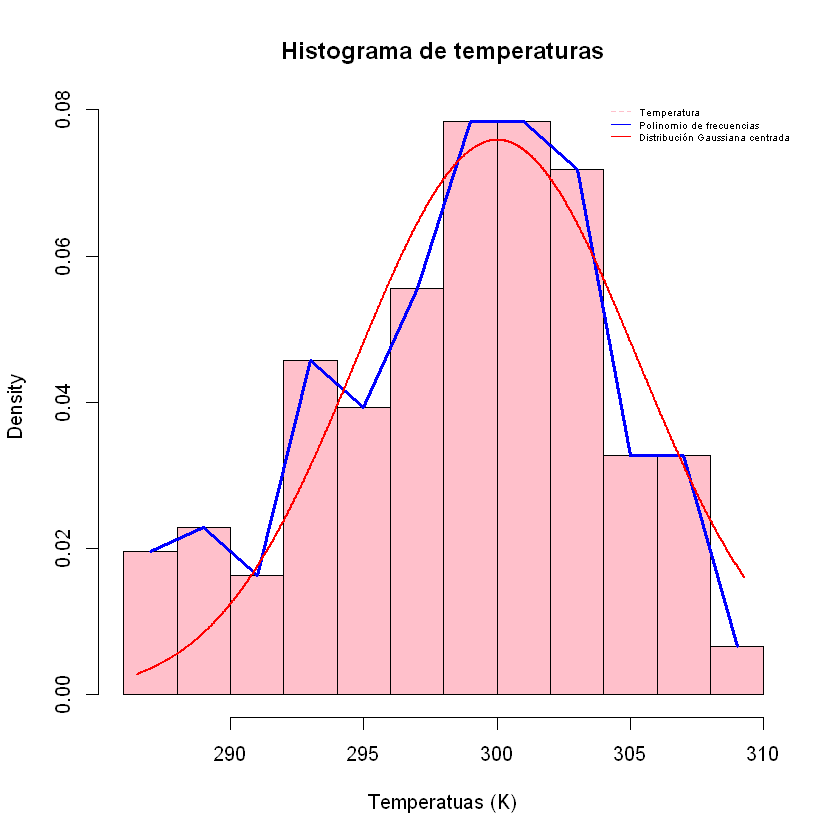

In [140]:
x=seq(min(temps), max(temps),length=1000)
distgaus=dnorm(x, 300, sd=sd(temps))
h1=hist(temps,breaks=n_bins, prob=TRUE, col="pink", main="Histograma de temperaturas",xlab="Temperatuas (K)")
lines(h1$mids,h1$density,col="blue",lwd=3)
lines(x, distgaus, col = "red", lwd = 2)
legend(x="topright",legend=c("Temperatura","Polinomio de frecuencias","Distribución Gaussiana centrada"), lty=c(2,1,1), col=c("pink","blue","red"),cex=0.5,bty="n")

No es complicado darse cuenta que, efectivamente, está desplazada hacia la derecha, de acuerdo con los resultados del coeficiente de Fisher (cae mucho más abruptamente hacia la derecha que hacia la izquierda, comparada con la distribución normal). Por otro lado la curtosis indica que la campana es más achatada que la de una dist normal. Desde el gráfica es bastante complicado hacer una estimación debido a la asimetría de nuestros datos. Sin embargo, se puede medio intuir debido a lo lento que cae para valores bajos de la temperatura. Desde luego, no serviría como justificación, pero si como apoyo al coeficiente de la curtosis.

## Cuestión 7

Para presentar esta gráfica, es más óptimo poner los NAs como 0s en  vez que quitarlos sencillamente, ya que dice más. La mediana se puede estimar como el valor que esté en la mitad de la ECDF. Es relativamente facil ver esto si ploteamos la de frecuencia relativa, tal que 

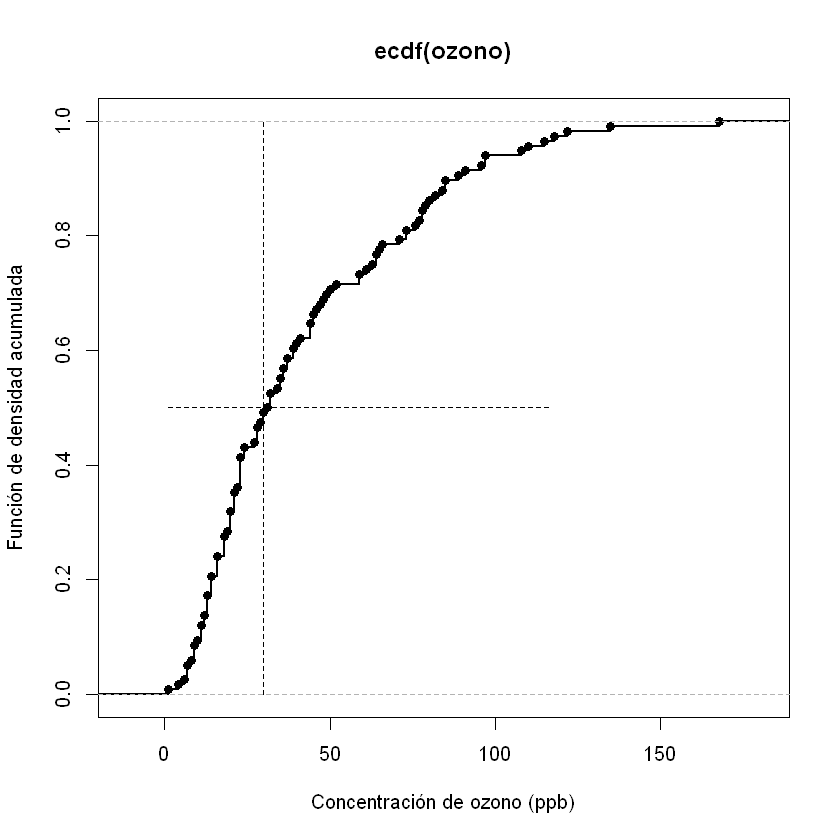

In [141]:
ozono=sort(Ozone)
plot(ecdf(ozono),verticals=TRUE,lwd=2,xlab="Concentración de ozono (ppb)",ylab="Función de densidad acumulada")
lines(seq(1,length(ozono)),0.5*rep(1,length(ozono)),lty=2)
lines(30*rep(1,length(ozono)),cumsum(ozono)/max(cumsum(ozono)),lty=2)

Del gráfico podemos estimar aproximadamente que la mediana está más o menos en  30, siendo este parámetro estimado un poco a ojo. Para ver la cercanía, calculamos la mediana con el código.

In [142]:
median(ozono)

[1] 31.5

En efecto, ambos valores se parecen mucho.

## Cuestión 8

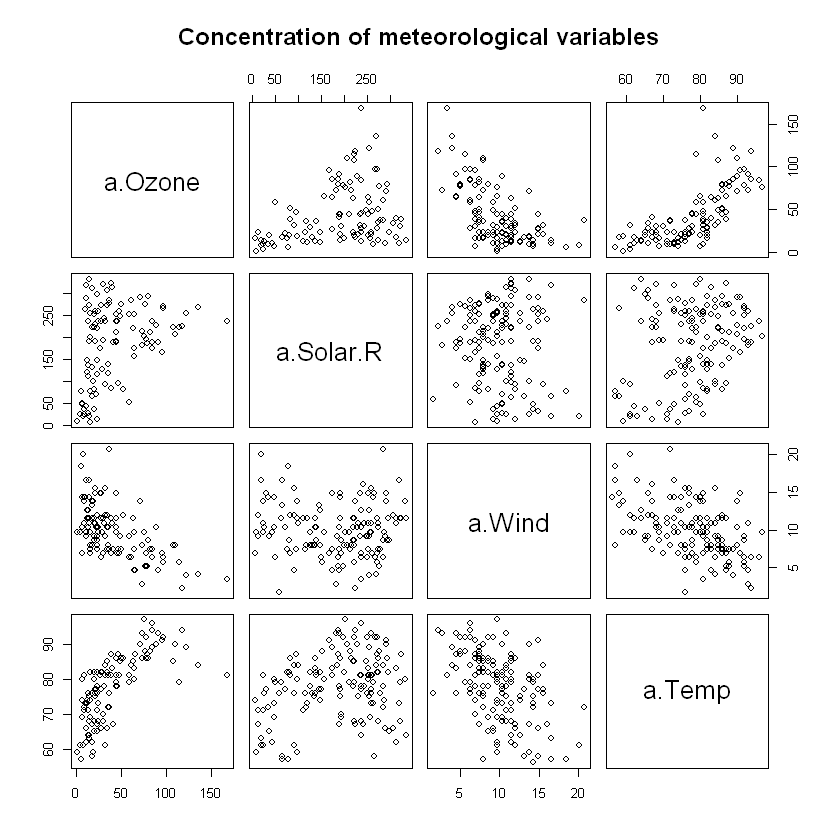

In [143]:
table2=data.frame(a$Ozone,a$Solar.R,a$Wind,a$Temp)
pairs(table2, main="Concentration of meteorological variables")

La dependecia del ozono respecto a la radianza, para valores bajos de la concentración de ozono no hay un comportamiento claro ya que encontramos puntos con muy alta y baja radianza. Sin embargo, según aumenta la concentración de ozono, la radianza va acercándose a un valor cercano a 250. Es decir, el comportamiento de la radianza respecto al ozono tiende a ser constante para valores de la concentración de ozono altos.

Por otro lado, el comportamiento del ozono respecto a la velocidad del viento está bastante más determinado, siendo la velocidad alta para valores de concentración de ozono altas, y decreciendo según esta última crece, en lo que parece un decaimiento exponencial. Si la pendiente fuese lo suficientemente pequeña, se podría argumentar que ambas variables podrían ser inversamente proporcionales. Una forma de comprobarlo sería tomar logarítmos a ambos lados y ver el comportamiento de las variables, para poder determinar si efectivamente se parece más a un comportamiento de decaimiento exponencial o a uno de 1/x

Por último, la concentración respecto a la temperatura tiene un aparente comportamiento creciente según crecen ambas variables Si bien la dispersión de los datos hace complicado determinar un comportamiento, se podría estimar este crecimiento como uno lineal o uno exponencial con una pendiente muy poco pronunciada.